In [ ]:
tf.data.experimental.save(ds, '/content/drive/MyDrive/liveness')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# should change in any run

xx_rot45=x_ffinal
# xx_rot90=x_ffinal
# xx_flip=x_ffinal
# xx_base=x_ffinal

In [ ]:
xxxx_f=np.concatenate([xx_rot45,xx_rot90,xx_flip ,xx_base],axis=0)
print(xxxx_f.shape)
y=np.concatenate([y,y,y,y], axis=0)
# print(len(y))
y=np.array(y)
print(len(y))

(980, 88, 88, 12)
980


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(xxxx_f, y, test_size=0.15, random_state=42)
print(x_train.shape)
print(x_test.shape)
x_train=np.array([np.array(x).astype('float16') for x in x_train]) 
x_test=np.array([np.array(x).astype('float16') for x in x_test])
print(x_train.shape)
print(x_test.shape)

(833, 88, 88, 12)
(147, 88, 88, 12)
(833, 88, 88, 12)
(147, 88, 88, 12)


In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
# work with python 1
import keras
from keras import layers
input_img = keras.Input(shape=(88, 88,12,1))

x = layers.Conv3D(16, (3, 3,12), activation='relu', padding='same')(input_img)
x = layers.MaxPooling3D((2, 2,1), padding='same')(x)
x = layers.Conv3D(8, (3, 3,12), activation='relu', padding='same')(x)
x = layers.MaxPooling3D((2, 2,1), padding='same')(x)
x = layers.Conv3D(8, (3, 3,12), activation='relu', padding='same')(x)
encoded = layers.MaxPooling3D((2, 2,1), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = layers.Conv3D(8, (3, 3,12), activation='relu', padding='same')(encoded)
x = layers.UpSampling3D((2, 2,1))(x)
x = layers.Conv3D(8, (3, 3,12), activation='relu', padding='same')(x)
x = layers.UpSampling3D((2, 2,1))(x)
x = layers.Conv3D(16, (3, 3,12), activation='relu', padding='same')(x)
x = layers.UpSampling3D((2, 2,1))(x)
decoded = layers.Conv3D(1, (3, 3,12), activation='sigmoid', padding='same')(x)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 88, 88, 12, 1)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 88, 88, 12, 16)    1744      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 44, 44, 12, 16)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 44, 44, 12, 8)     13832     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 22, 22, 12, 8)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 22, 22, 12, 8)     6920      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 11, 11, 12, 8)    

In [ ]:
autoencoder.load_weights('/content/drive/My Drive/tmp/my4barabar-ConvAE-12ch/12d_52epoch.h5')

In [ ]:
import tensorflow as tf
# from numpy import join
CURRENT_LOG_DIRECTORY='/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5'
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
mc_callback = tf.keras.callbacks.ModelCheckpoint(str.join(CURRENT_LOG_DIRECTORY, 'best_model.h5'), save_best_only=True)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=CURRENT_LOG_DIRECTORY, histogram_freq=1)
callback_list = [es_callback, mc_callback, tb_callback]

In [ ]:
x_train=np.array([np.array(x).astype('float32')/255 for x in x_train])  
x_test=np.array([np.array(x).astype('float32')/255 for x in x_test])
x_train = np.reshape(x_train, (len(x_train), 88, 88,12,1))
x_test = np.reshape(x_test, (len(x_test), 88, 88,12,1))

In [ ]:
from keras.callbacks import TensorBoard
history=autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=840,
                shuffle=True,
                callbacks=callback_list,
                # validation_data=(x_test, x_test),
                validation_split=0.15)

Epoch 1/50
1/1 [==============================] - ETA: 0s - loss: 0.6649WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: b/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5e/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5s/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5t/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5_/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5m/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5o/content/drive/My Drive/tmp/my12dconvAE/model110_180_200.h5d

KeyboardInterrupt: ignored

In [ ]:
############WWWWWWWWWWWWWWWWWWWWWWW

In [ ]:
import tensorflow as tf
# from numpy import join
CURRENT_LOG_DIRECTORY='/content/drive/My Drive/tmp/my4barabar-ConvAE-12ch/model50_50.h5'
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
mc_callback = tf.keras.callbacks.ModelCheckpoint(str.join(CURRENT_LOG_DIRECTORY, 'best_model.h5'), save_best_only=True)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=CURRENT_LOG_DIRECTORY, histogram_freq=1)
callback_list = [es_callback, mc_callback, tb_callback]

In [ ]:
autoencoder.save_weights('/content/drive/My Drive/tmp/my4barabar-ConvAE-12ch/12d_52_52epoch.h5')

In [ ]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder=Model(input_img,encoded)
encoded_imgs=encoder.predict(x_test)
# decoded_imgs=decoder.predict(encoded_imgs)
encodedTrainImages=encoder.predict(x_train)
# decoded_imgs_train=decoder.predict(encodedTrainImages)

In [ ]:
mlp_train=encodedTrainImages
mlp_test=encoded_imgs
print(mlp_train.shape)
print(mlp_test.shape)
print(mlp_test)
xtrain1=mlp_train
xtest1=mlp_test
print(xtrain1.shape)
print(xtest1.shape)
x_train=xtrain1
x_test=xtest1

print(x_train.shape)
print(x_test.shape)
x_train=x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(833, 11, 11, 12, 8)
(147, 11, 11, 12, 8)
[[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
     3.34726429e+00 7.04756165e+00]
    [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
     4.99863672e+00 1.30914602e+01]
    [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
     8.60739326e+00 1.85092163e+01]
    ...
    [1.01389437e+01 0.00000000e+00 0.00000000e+00 ... 1.09108329e+00
     6.21392441e+00 8.78992653e+00]
    [9.23707294e+00 0.00000000e+00 0.00000000e+00 ... 1.16668940e+00
     4.00958252e+00 4.98453236e+00]
    [8.33873844e+00 0.00000000e+00 0.00000000e+00 ... 1.72594714e+00
     1.86450446e+00 1.57663631e+00]]

   [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
     3.65415883e+00 7.23729753e+00]
    [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
     5.27033710e+00 1.33329239e+01]
    [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
     8.77402687e+00 1.84875145e+01]
   

In [ ]:
##mlp
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
# Model
from keras.models import Sequential
# Layers
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from sklearn import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# parameters
input_dim = 11616
output_dim = 1
batch_size = 247
n_epochs = 400


In [ ]:
x_train=np.array([np.array(x).astype('float32')/255 for x in x_train])  
x_test=np.array([np.array(x).astype('float32')/255 for x in x_test])
# x_train = np.reshape(x_train, (len(x_train), 88, 88,12,1))
# x_test = np.reshape(x_test, (len(x_test), 88, 88,12,1))
x_train=x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(833, 11616)
(147, 11616)


mse is:  0.012372057791527535
rsq is:  -1.0853423250135408
r2 is:  0.3106138037807985
tempMse is:  0.012372057791527535
tempRsq is:  -1.0853423250135408


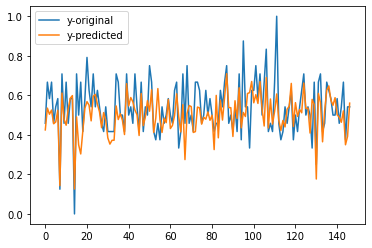

this is in repeat  0
mse is:  0.011882363362776387
rsq is:  -1.0028030630891909
r2 is:  0.33790017644692616
tempMse is:  0.011882363362776387
tempRsq is:  -1.0028030630891909


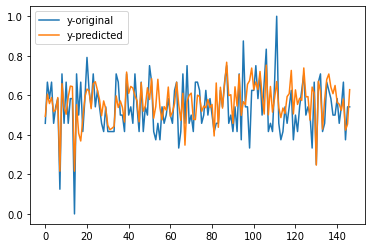

this is in repeat  1


In [ ]:
######################WWWWWWWWWWWWWWWWWWWWWW
def BuildModel():
  model = Sequential()
  model.add(Dense(5000, input_dim=11616,activation='relu')) 
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(500, activation='relu'))
  model.add(Dense(1,activation='linear'))
  # model.add(Dense(1, input_dim=8000,activation='linear'))
  model.compile(loss="mean_squared_error", optimizer="adam")   
  return model

def Rsq(y_p):
  avg_y=sum(y_test)/len(y_test)
  avg_l=[]
  i=1
  for i in range(37):
    avg_l.append(avg_y)
  #surat
  s=sum([pow((x - y),2) for x, y in zip(y_test, y_p)])
  #makhraj
  m=sum([pow((x - y),2) for x, y in zip(y_test, avg_l)])
  rsq=1-(s/m)
  return rsq

i=1
tempMse=100
tempRsq=-100
for i in range(100):
  regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=400,batch_size=247)
  regressor.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                      verbose=0, validation_data=(x_test, y_test)) 
  y_pred = regressor.predict(x_test)
  mse_krr = mean_squared_error(y_test, y_pred)
  print('mse is: ',mse_krr)
  if mse_krr<=tempMse:
    tempMse=mse_krr
  rsq=Rsq(y_pred)
  print('rsq is: ',rsq)
  if rsq>=tempRsq:
    tempRsq=rsq
  r2=r2_score(y_test, y_pred)
  print('r2 is: ',r2)
  print('tempMse is: ' , tempMse)
  print('tempRsq is: ',tempRsq)
  plt.plot(y_test, label="y-original")
  plt.plot(y_pred, label="y-predicted")
  plt.legend()
  plt.show()
  print('this is in repeat ',i)
  ##########
print('****')
print('Best tempMse is: ',tempMse)
print('Best tempRsq is: ',tempRsq)

mse is:  0.009464011623503047
rsq is:  -0.5951836255102325
r2 is:  0.47265369399025936
tempMse is:  0.009464011623503047
tempRsq is:  -0.5951836255102325


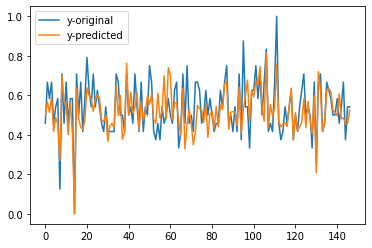

this is in repeat  0


KeyboardInterrupt: ignored

In [ ]:
def BuildModel():
  model = Sequential()
  model.add(Dense(5000, input_dim=11616,activation='relu')) 
  model.add(Dense(1000, activation='relu'))
  model.add(Dense(500, activation='relu'))
  model.add(Dense(1,activation='linear'))
  # model.add(Dense(1, input_dim=8000,activation='linear'))
  model.compile(loss="mean_squared_error", optimizer="adam")   
  return model

def Rsq(y_p):
  avg_y=sum(y_test)/len(y_test)
  avg_l=[]
  i=1
  for i in range(37):
    avg_l.append(avg_y)
  #surat
  s=sum([pow((x - y),2) for x, y in zip(y_test, y_p)])
  #makhraj
  m=sum([pow((x - y),2) for x, y in zip(y_test, avg_l)])
  rsq=1-(s/m)
  return rsq

i=1
tempMse=100
tempRsq=-100
for i in range(100):
  regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=400,batch_size=247)
  regressor.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                      verbose=0, validation_data=(x_test, y_test)) 
  y_pred = regressor.predict(x_test)
  mse_krr = mean_squared_error(y_test, y_pred)
  print('mse is: ',mse_krr)
  if mse_krr<=tempMse:
    tempMse=mse_krr
  rsq=Rsq(y_pred)
  print('rsq is: ',rsq)
  if rsq>=tempRsq:
    tempRsq=rsq
  r2=r2_score(y_test, y_pred)
  print('r2 is: ',r2)
  print('tempMse is: ' , tempMse)
  print('tempRsq is: ',tempRsq)
  plt.plot(y_test, label="y-original")
  plt.plot(y_pred, label="y-predicted")
  plt.legend()
  plt.show()
  print('this is in repeat ',i)
  ##########
print('****')
print('Best tempMse is: ',tempMse)
print('Best tempRsq is: ',tempRsq)

In [ ]:
s=0
for i in range(37):
  print(y_test[i]," , ",y_pred[i]," , y_test-y_pred= ",y_test[i]-y_pred[i]," , ",abs(y_test[i]-y_pred[i])>0.1) 
  if abs(y_test[i]-y_pred[i])>0.1:
    s=s+1
print(s ," of 37 has bigger than 0.1 different")

0.4583333333333331  ,  0.49596387  , y_test-y_pred=  -0.03763053814570133  ,  False
0.6666666666666664  ,  0.5670192  , y_test-y_pred=  0.09964744249979629  ,  False
0.5833333333333334  ,  0.5134108  , y_test-y_pred=  0.06992252667744958  ,  False
0.6666666666666664  ,  0.58909565  , y_test-y_pred=  0.07757101456324234  ,  False
0.4583333333333331  ,  0.41697365  , y_test-y_pred=  0.04135968287785824  ,  False
0.5416666666666665  ,  0.48651925  , y_test-y_pred=  0.05514741937319423  ,  False
0.5833333333333334  ,  0.45520148  , y_test-y_pred=  0.1281318565209707  ,  True
0.1249999999999999  ,  0.26927465  , y_test-y_pred=  -0.14427465200424205  ,  True
0.7083333333333329  ,  0.698581  , y_test-y_pred=  0.009752353032429606  ,  False
0.4583333333333331  ,  0.5678112  , y_test-y_pred=  -0.10947785774866764  ,  True
0.6666666666666664  ,  0.558741  , y_test-y_pred=  0.10792569319407119  ,  True
0.4583333333333331  ,  0.4020514  , y_test-y_pred=  0.056281944115956384  ,  False
0.5833333333

In [ ]:
newlabel=((y_main.max()-y_main.min())*y_pred)+y_main.min()
print(newlabel)
newy_test=((y_main.max()-y_main.min())*y_test)+y_main.min()
print(newy_test)

[7.6903133 7.860846  7.732186  7.91383   7.5007367 7.6676464 7.5924835
 7.1462593 8.176595  7.862747  7.8409786 7.4649234 7.841176  7.493813
 6.5042553 8.027862  7.660166  7.553271  7.526206  7.6449537 8.031968
 7.9407697 7.893984  7.746023  7.8910527 7.9493856 7.9059772 7.6360826
 7.624115  7.705334  7.3813744 7.5678577 7.59799   7.548116  8.050717
 7.6952205 7.939518  7.407336  7.487122  8.329255  7.7072353 7.9772873
 7.7230506 7.78908   7.9704056 7.5202913 7.8630767 7.6344976 7.743062
 7.927702  7.831002  7.9572926 7.6479187 7.6005526 7.9672594 7.664911
 7.73504   8.176677  7.6526585 8.273708  8.187681  7.641798  7.852302
 7.8426414 7.6208854 7.4531984 8.027259  7.2879744 7.5909004 7.7669706
 7.5938544 7.339286  7.4960785 7.819455  7.77437   7.762732  7.612123
 7.8327727 7.4296064 7.71005   7.7476234 7.5339437 7.803425  7.5607033
 7.82133   7.766998  8.074421  8.111065  7.5274324 7.733882  7.7419577
 7.7402577 7.5718613 8.039481  7.4784255 7.767712  7.9345384 8.122819
 7.617181  7.9

In [ ]:
s=0
for i in range(37):
  print(newy_test[i]," , ",newlabel[i]," , y_test-y_pred= ",newy_test[i]-newlabel[i]," , ",abs(newy_test[i]-newlabel[i])>0.1) 
  if abs(newy_test[i]-newlabel[i])>0.1:
    s=s+1
print(s ," of 37 has bigger than 0.1 different")

7.6  ,  7.6903133  , y_test-y_pred=  -0.09031333923339879  ,  False
8.1  ,  7.860846  , y_test-y_pred=  0.239153957366943  ,  True
7.9  ,  7.732186  , y_test-y_pred=  0.1678141593933109  ,  True
8.1  ,  7.91383  , y_test-y_pred=  0.18617019653320277  ,  True
7.6  ,  7.5007367  , y_test-y_pred=  0.09926328659057582  ,  False
7.8  ,  7.6676464  , y_test-y_pred=  0.13235359191894513  ,  True
7.9  ,  7.5924835  , y_test-y_pred=  0.30751647949218786  ,  True
6.8  ,  7.1462593  , y_test-y_pred=  -0.3462593078613283  ,  True
8.2  ,  8.176595  , y_test-y_pred=  0.023405265808104758  ,  False
7.6  ,  7.862747  , y_test-y_pred=  -0.26274719238281286  ,  True
8.1  ,  7.8409786  , y_test-y_pred=  0.2590213775634762  ,  True
7.6  ,  7.4649234  , y_test-y_pred=  0.13507661819457972  ,  True
7.9  ,  7.841176  , y_test-y_pred=  0.058823966979980824  ,  False
7.9  ,  7.493813  , y_test-y_pred=  0.4061869621276859  ,  True
6.5  ,  6.5042553  , y_test-y_pred=  -0.0042552947998046875  ,  False
8.2  ,  8.0

In [ ]:
#####################end 110main-180aug###################################

In [ ]:
# # correct -main code
# pixels = x3rot20[60]
# pixels=np.array(pixels)
# r=pixels.shape[0]/2
# print(r)
# # print(pixels.type)
# for i in range(pixels.shape[0]):
#     for j in range(pixels.shape[1]):
#       pixels[i,j]=np.where( [np.power((i-44),2)+np.power((j-44),2)]>=np.power(44,2) ,[225, 225, 225], pixels[i,j])


44.0


In [ ]:
# # from PIL import Image
# # img = Image.open('/home/usr/convertimage.png')
# pixels = x3rot20[60]
# pixels=np.array(pixels)
# # print(pixels.type)
# for i in range(pixels.shape[0]):
#     for j in range(pixels.shape[1]):
#       pixels[i,j]=np.where( pixels[i,j]==[0:119,] ,255, pixels[i,j])
#       # pixels[i,j]=np.where(pixels[i,j,2] == [0, 0, 0],[225, 225, 225], pixels[i,j])
#       # pixels[i,j]=np.where(pixels[i,j,3] == [0, 0, 0],[225, 225, 225], pixels[i,j])
      
#       pixels[i,j]=np.where(0<=  pixels[i,j,1] <=119 and 0<=  pixels[i,j,2] <=136 
#                            and 0<=  pixels[i,j,3] <=153,[225, 225, 225], pixels[i,j])
#       # np.where(pixels[i,j] == [0, 0, 0,255],[0, 0, 0,255],[225, 225, 225,255])
#       # if (pixels[i,j] == [0, 0, 0]).all:
#         # pixels[i,j] = [225, 225, 225]
#         # pixels[i,j] = [225, 225, 225]
#         # print('a')

# for i in range(5):
#     for j in range(5):
#       print(pixels[i,j])
            # if any(pixels[i,j]) == (0, 0, 0):
            # if any(pixels[i,j]) == (0, 0, 0)
            #     pixels[i,j] = (225, 225, 225)
                # print('a')

In [ ]:
# x_flip=np.concatenate([x1rot20,x2rot20,x3rot20 ,x4rot20],axis=3)
# print(x_rot20.shape)

# xxxx=np.concatenate([x_base,x_rot15,x_rot45,x_rot90, x_rot180, x_flip_hori, x_flip],axis=0 )
# x_train, x_test, y_train, y_test=train_test_split(xxxx, y, test_size=0.15, random_state=42)
# print(x_train.shape)
# print(x_test.shape)
# x_train, x_test, y_train, y_test=train_test_split(x_base, y, test_size=0.15, random_state=42)
# print(x_train.shape)
# print(x_test.shape)
# x_train=np.array([np.array(x).astype('float16') for x in x_train]) 
# x_test=np.array([np.array(x).astype('float16') for x in x_test])

# x_train = np.reshape(x_train, (len(x_train), 88, 88,12,1))
# x_test = np.reshape(x_test, (len(x_test), 88, 88,12,1))


(1715, 88, 88, 12)
1715


In [ ]:
autoencoder.save_weights('/content/drive/My Drive/tmp/cnn_autoencoder/my4barabar-ConvAE-12ch/my4barabar_52_52epoch.h5')   

In [ ]:
# from keras.models import load_weights
# autoencoder.load_weights('/content/drive/My Drive/tmp/autoencoder/my4barabar-ConvAE-12ch/*********.h5')

In [ ]:
x_train=np.array([np.array(x).astype('float16') for x in x_train]) 
x_test=np.array([np.array(x).astype('float16') for x in x_test])

In [ ]:
x_train=np.array([np.array(x).astype('uint8') for x in x_train]/) 
print(x_train.shape)

(208, 88, 88, 3)


In [ ]:
# should change
# x_train=x_train3
# x_test=x_test3in]) 
x_test=np.array([np.array(x).astype('uint8') for x in x_test])
x_train=np.array([np.array(x).astype('uint8') for x in x_tra
print(x_train.shape)
print(x_test.shape)

(208, 88, 88, 3)
(37, 88, 88, 3)


In [ ]:
plt.imshow(x_test[8],cmap='gray')
# plt.show()

In [ ]:
# work with python 1
import keras
from keras import layers
input_img = keras.Input(shape=(88, 88,3,1))
# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(16, (3, 3), activation='relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# x = layers.Conv3D(16, (3, 3,6), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling3D((2, 2,1), padding='same')(x)
# x = layers.Conv3D(8, (3, 3,6), activation='relu', padding='same')(x)
# x = layers.MaxPooling3D((2, 2,1), padding='same')(x)
# x = layers.Conv3D(8, (3, 3,6), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling3D((2, 2,1), padding='same')(x)
# # at this point the representation is (4, 4, 8) i.e. 128-dimensional
# x = layers.Conv3D(8, (3, 3,6), activation='relu', padding='same')(encoded)
# x = layers.UpSampling3D((2, 2,1))(x)
# x = layers.Conv3D(8, (3, 3,6), activation='relu', padding='same')(x)
# x = layers.UpSampling3D((2, 2,1))(x)
# x = layers.Conv3D(16, (3, 3,6), activation='relu', padding='same')(x)
# x = layers.UpSampling3D((2, 2,1))(x)
# decoded = layers.Conv3D(1, (3, 3,6), activation='sigmoid', padding='same')(x)

x = layers.Conv3D(16, (3, 3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling3D((2, 2,1), padding='same')(x)
x = layers.Conv3D(8, (3, 3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling3D((2, 2,1), padding='same')(x)
x = layers.Conv3D(8, (3, 3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling3D((2, 2,1), padding='same')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x = layers.Conv3D(8, (3, 3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling3D((2, 2,1))(x)
x = layers.Conv3D(8, (3, 3,3), activation='relu', padding='same')(x)
x = layers.UpSampling3D((2, 2,1))(x)
x = layers.Conv3D(16, (3, 3,3), activation='relu', padding='same')(x)
x = layers.UpSampling3D((2, 2,1))(x)
decoded = layers.Conv3D(1, (3, 3,3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 88, 88, 3, 1)]    0         
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 88, 88, 3, 16)     448       
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 44, 44, 3, 16)     0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 44, 44, 3, 8)      3464      
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 22, 22, 3, 8)      0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 22, 22, 3, 8)      1736      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 11, 11, 3, 8)     

In [ ]:
# autoencoder.save_weights('/content/drive/My Drive/tmp/autoencoder/my_imagenet40-88.h5')
# autoencoder.save_weights('/content/drive/My Drive/tmp/autoencoder/my_imagenet40-88&map350.h5')
autoencoder.save_weights('/content/drive/My Drive/tmp/autoencoder/my_imagenet40-88&map3100.h5')

In [ ]:
# from keras.models import load_weights
# autoencoder.load_weights('/content/drive/My Drive/tmp/autoencoder/my_imagenet40-88.h5')
# autoencoder.load_weights('/content/drive/My Drive/tmp/autoencoder/my_imagenet40-88&map350.h5')
autoencoder.load_weights('/content/drive/My Drive/tmp/autoencoder/my_imagenet40-88&map3100.h5')

In [ ]:
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
x_train=np.array([np.array(x).astype('float32')/255 for x in x_train])  
x_test=np.array([np.array(x).astype('float32')/255 for x in x_test])
x_train = np.reshape(x_train, (len(x_train), 88, 88,3,1))
x_test = np.reshape(x_test, (len(x_test), 88, 88,3,1))
# x_train=x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
# x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

In [ ]:
print(x_train.shape)

(208, 88, 88, 3, 1)


In [ ]:
# tensorboard --logdir=/tmp/autoencoder
# from keras.callbacks import TensorBoard

history=autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=250,
                shuffle=True,
                validation_split=0.15)
                # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
1/1 [==============================] - 1s 966ms/step - loss: 0.7114 - val_loss: 0.7099
Epoch 2/50
1/1 [==============================] - 1s 639ms/step - loss: 0.7099 - val_loss: 0.7085
Epoch 3/50
1/1 [==============================] - 1s 612ms/step - loss: 0.7085 - val_loss: 0.7071
Epoch 4/50
1/1 [==============================] - 1s 659ms/step - loss: 0.7071 - val_loss: 0.7057
Epoch 5/50
1/1 [==============================] - 1s 661ms/step - loss: 0.7057 - val_loss: 0.7043
Epoch 6/50
1/1 [==============================] - 1s 649ms/step - loss: 0.7043 - val_loss: 0.7029
Epoch 7/50
1/1 [==============================] - 1s 627ms/step - loss: 0.7029 - val_loss: 0.7011
Epoch 8/50
1/1 [==============================] - 1s 634ms/step - loss: 0.7011 - val_loss: 0.6993
Epoch 9/50
1/1 [==============================] - 1s 640ms/step - loss: 0.6993 - val_loss: 0.6973
Epoch 10/50
1/1 [==============================] - 1s 624ms/step - loss: 0.6973 - val_loss: 0.6953
Epoch 11/50
1/1 [==

In [ ]:
# tensorboard --logdir=/tmp/autoencoder
# tensorboard --logdir=/content/drive/My Drive/tmp/autoencoder
from keras.callbacks import TensorBoard
import tensorflow as tf

tf.keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/tmp/autoencoder')

# history=autoencoder.fit(x_train, x_train,
#                 epochs=200,
#                 batch_size=250,
#                 shuffle=True,
#                 validation_data=(x_test, x_test))
                # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

In [ ]:
# map3
decoded_imgs = autoencoder.predict(x_test)
tt=autoencoder.predict(x_train)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_train[i].reshape(88, 88,3)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(tt[i].reshape(88, 88,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(88, 88,3)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(88, 88,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



SyntaxError: ignored

In [ ]:
#map2 88*88*3 conv
## summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['x_train', 'x_test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['x_train', 'x_test'], loc='upper left')
plt.show()
# 2-4 6_chanel 88*88*6  fourth

NameError: ignored

In [ ]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder=Model(input_img,encoded)

# de_L7=autoencoder.layers[-7]
# de_L6=autoencoder.layers[-6]
# de_L5=autoencoder.layers[-5]
# de_L4=autoencoder.layers[-4]
# de_L3=autoencoder.layers[-3]
# de_L2=autoencoder.layers[-2]
# de_L1=autoencoder.layers[-1]
# decoder=Model(encoded,de_L1(de_L2(de_L3(de_L4(de_L5(de_L6(de_L7(encoded))))))))
encoded_imgs=encoder.predict(x_test)
# decoded_imgs=decoder.predict(encoded_imgs)
encodedTrainImages=encoder.predict(x_train)
# decoded_imgs_train=decoder.predict(encodedTrainImages)

In [ ]:
##extract middle layer
# mlp_train=encoder.predict(x_train)
# mlp_test=encoder.predict(x_test)
mlp_train=encodedTrainImages
mlp_test=encoded_imgs
print(mlp_train.shape)
print(mlp_test.shape)
print(mlp_test)
xtrain1=mlp_train
xtest1=mlp_test
print(xtrain1.shape)
print(xtest1.shape)

(208, 11, 11, 12, 8)
(37, 11, 11, 12, 8)
[[[[[135429.5   127026.56  123148.98  ... 122594.76   99540.08
      77594.25 ]
    [152849.1   143810.27  140757.02  ... 132293.81  118833.695
      87669.516]
    [170062.08  163202.53  158975.53  ... 143106.12  138116.53
      99532.87 ]
    ...
    [134209.42  133955.94  126976.61  ...  94261.98  136884.84
      85336.19 ]
    [112101.43  115704.695 105142.04  ...  78289.85  119753.77
      71135.14 ]
    [ 88940.766  92308.26   85513.76  ...  63635.746  99152.875
      57839.332]]

   [[140036.72  131237.47  127647.8   ... 126502.87  103839.78
      78794.914]
    [158294.61  149084.34  145926.14  ... 136701.86  123900.49
      89076.99 ]
    [176031.22  169399.95  165203.62  ... 148158.14  143693.11
     101404.54 ]
    ...
    [138555.2   139357.66  132167.16  ...  98377.99  140946.22
      88560.84 ]
    [115723.33  120506.98  109586.336 ...  81809.76  123244.11
      73968.76 ]
    [ 91848.56   96207.695  89345.96  ...  66343.266 101983

In [ ]:
x_train=xtrain1
x_test=xtest1
# x_train=np.concatenate([xtrain2,xtrain3,xtrain4],axis=1)
# x_test=np.concatenate([xtest2,xtest3,xtest4],axis=1)
print(x_train.shape)
print(x_test.shape)

(208, 11, 11, 12, 8)
(37, 11, 11, 12, 8)


In [ ]:
x_train=x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test=x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(208, 11616)
(37, 11616)


In [ ]:
##mlp
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
# Model
from keras.models import Sequential
# Layers
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from sklearn import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# parameters
input_dim = 11616
output_dim = 1
batch_size = 247
n_epochs = 400


mse is:  64747.73389565524
rsq is:  -784837.3894382163
r2 is:  -784837.3894382162
tempMse is:  100
tempRsq is:  -100


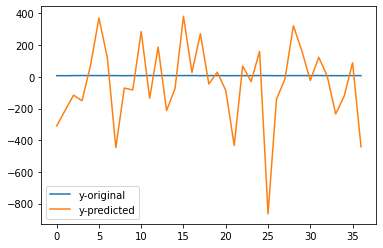

this is in repeat  0


KeyboardInterrupt: ignored

In [ ]:
##
# def BuildModel():
#   model = Sequential()
#   model.add(Dense(30, input_dim=128,activation='relu')) 
#   model.add(Dense(5, activation='relu')) 
#   model.add(Dense(1,activation='linear'))
#   model.compile(loss="mean_squared_error", optimizer="adam")   
#   return model
def BuildModel():
  model = Sequential()
  model.add(Dense(5000, input_dim=11616,activation='relu')) 
  model.add(Dense(1000, activation='relu')) 
  model.add(Dense(500, activation='relu')) 
  model.add(Dense(50, activation='relu')) 
  model.add(Dense(1,activation='linear'))
  # model.add(Dense(1, input_dim=5808,activation='linear'))
  model.compile(loss="mean_squared_error", optimizer="adam")   
  return model

def Rsq(y_p):
  avg_y=sum(y_test)/len(y_test)
  avg_l=[]
  i=1
  for i in range(37):
    avg_l.append(avg_y)
  #surat
  s=sum([pow((x - y),2) for x, y in zip(y_test, y_p)])
  #makhraj
  m=sum([pow((x - y),2) for x, y in zip(y_test, avg_l)])
  rsq=1-(s/m)
  return rsq

i=1
tempMse=100
tempRsq=-100
for i in range(100):
  regressor = KerasRegressor(build_fn=BuildModel,nb_epoch=400,batch_size=247)
  regressor.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, 
                      verbose=0, validation_data=(x_test, y_test)) 
  y_pred = regressor.predict(x_test)
  mse_krr = mean_squared_error(y_test, y_pred)
  print('mse is: ',mse_krr)
  if mse_krr<=tempMse:
    tempMse=mse_krr
  rsq=Rsq(y_pred)
  print('rsq is: ',rsq)
  if rsq>=tempRsq:
    tempRsq=rsq
  r2=r2_score(y_test, y_pred)
  print('r2 is: ',r2)
  print('tempMse is: ' , tempMse)
  print('tempRsq is: ',tempRsq)
  plt.plot(y_test, label="y-original")
  plt.plot(y_pred, label="y-predicted")
  plt.legend()
  plt.show()
  print('this is in repeat ',i)
  ##########
print('****')
print('Best tempMse is: ',tempMse)
print('Best tempRsq is: ',tempRsq)

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
mc_callback = tf.keras.callbacks.ModelCheckpoint(join(CURRENT_LOG_DIRECTORY, 'best_model.h5'), save_best_only=True)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=CURRENT_LOG_DIRECTORY, histogram_freq=1)
  callback_list = [es_callback, mc_callback, tb_callback]

In [ ]:
# print labels and compare them with true labels
s=0
for i in range(37):
  print(y_test[i]," , ",y_pred[i]," , y_test-y_pred= ",y_test[i]-y_pred[i]," , ",abs(y_test[i]-y_pred[i])>0.1) 
  if abs(y_test[i]-y_pred[i])>0.1:
    s=s+1
print(s ," of 37 has bigger than 0.1 different")   #2-4  6_chanels forth

7.7  ,  8.092084  , y_test-y_pred=  -0.3920839309692381  ,  True
7.9  ,  8.461633  , y_test-y_pred=  -0.5616327285766598  ,  True
7.9  ,  7.646396  , y_test-y_pred=  0.25360383987426793  ,  True
7.8  ,  7.766958  , y_test-y_pred=  0.033041763305663885  ,  False
7.9  ,  8.272885  , y_test-y_pred=  -0.3728853225708004  ,  True
8.0  ,  7.5863323  , y_test-y_pred=  0.4136676788330078  ,  True
7.5  ,  7.788493  , y_test-y_pred=  -0.28849315643310547  ,  True
8.1  ,  7.7613187  , y_test-y_pred=  0.33868131637573207  ,  True
8.2  ,  7.9714675  , y_test-y_pred=  0.22853250503539968  ,  True
7.8  ,  7.84113  , y_test-y_pred=  -0.041129779815674006  ,  False
7.9  ,  8.099369  , y_test-y_pred=  -0.19936904907226527  ,  True
7.6  ,  7.551085  , y_test-y_pred=  0.048915004730224254  ,  False
7.9  ,  8.006745  , y_test-y_pred=  -0.10674533843994105  ,  True
7.5  ,  7.617842  , y_test-y_pred=  -0.11784219741821289  ,  True
7.8  ,  7.94985  , y_test-y_pred=  -0.14985008239746112  ,  True
7.8  ,  7.867

In [ ]:
###### finish CAE #################################################################

# ***Variational AE***

In [ ]:
import keras
from keras import layers
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
x_train=np.array([np.array(x).astype('float32')/255 for x in x_train])  
x_test=np.array([np.array(x).astype('float32')/255 for x in x_test])
# x_train = np.reshape(x_train, (len(x_train), 28, 28,1))
# x_test = np.reshape(x_test, (len(x_test), 28, 28,1))

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# x_train = np.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = np.reshape((len(x_test), np.prod(x_test.shape[1:])))



In [ ]:
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=250,
        validation_data=(x_test, x_test))

Epoch 1/100
1/1 [==============================] - 0s 56ms/step - loss: 542.8792 - val_loss: 541.9506
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 541.9608 - val_loss: 540.9416
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 540.9681 - val_loss: 539.8577
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 539.9111 - val_loss: 538.5457
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 538.6059 - val_loss: 537.0109
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 537.1126 - val_loss: 535.2730
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 535.4214 - val_loss: 533.5672
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 533.5409 - val_loss: 531.4394
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 531.6017 - val_loss: 529.2764
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 529.4550 

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=250)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

TypeError: ignored

<Figure size 432x432 with 0 Axes>

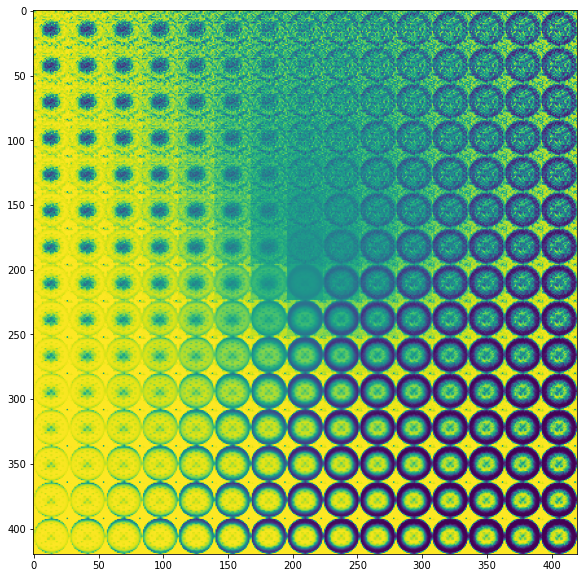

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import keras
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector
    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


# MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()


image_size = x_train.shape[1]
original_dim = image_size * image_size

# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# x_train = np.reshape(x_train, [-1, original_dim])
# x_test = np.reshape(x_test, [-1, original_dim])

x_train = np.reshape(x_train, [-1, 163072])
x_test = np.reshape(x_test, [-1, 29008])
x_train=np.array([np.array(x).astype('float32')/255 for x in x_train])  
x_test=np.array([np.array(x).astype('float32')/255 for x in x_test])
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 2
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    help_ = "Load h5 model trained weights"
    parser.add_argument("-w", "--weights", help=help_)
    help_ = "Use mse loss instead of binary cross entropy (default)"
    parser.add_argument("-m",
                        "--mse",
                        help=help_, action='store_true')
    args = parser.parse_args()
    models = (encoder, decoder)
    data = (x_test, y_test)

    # VAE loss = mse_loss or xent_loss + kl_loss
    if args.mse:
        reconstruction_loss = mse(inputs, outputs)
    else:
        reconstruction_loss = binary_crossentropy(inputs,
                                                  outputs)

    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')

    if args.weights:
        vae.load_weights(args.weights)
    else:
        # train the autoencoder
        vae.fit(x_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(x_test, None))
        vae.save_weights('vae_mlp_mnist.h5')

    plot_results(models,
                 data,
                 batch_size=batch_size,
                 model_name="vae_mlp")

In [ ]:
print(original_dim)
print(x_test.shape)

614656
(37, 784)
